In [2]:
# TensoFlow and tf. keras
import tensorflow as tf
from tensorflow import keras

# Support libraries that help us
import numpy as np
import matplotlib.pyplot as plt

In [3]:
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
    except RuntimeError as e:
        print(e)


In [4]:
# Download the fashion MNIST dataset

fashion_mnist =keras.datasets.fashion_mnist

# Create the training set and test set with their images and classes
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# We save the respective output of the neuron and the name of each classes
class_names = ['T-shirt/top','Trouser','Pullover','Dress','Coat',
               'Sandal', 'Shirt', 'Sneaker','Bag','Ankle boot']

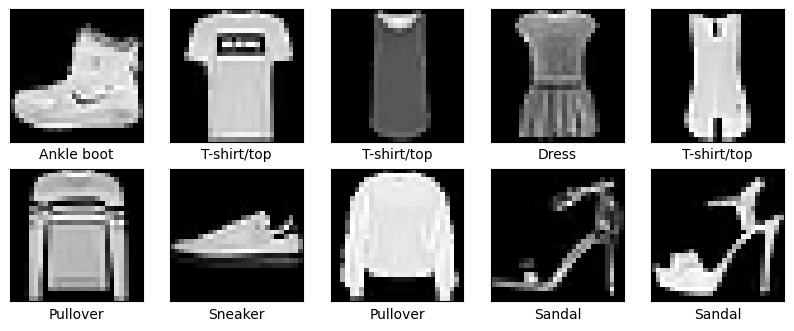

In [5]:
# Showing the images
plt.figure(figsize=(10,10))
for i in range(10):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i],cmap='gray')
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [6]:
'''
We initialize an object sequential type from keras, who let us 
create easily different layers of an CNN
'''
model = keras.Sequential()

# The layer of our CNN that are 64 neurons of convolution with a 2x2 kernel
model.add(keras.layers.Conv2D(filters=64, kernel_size=2, padding='same',
                              activation='relu', input_shape=(28,28,1)))

# Afterward, we applied a Max pooling of 2x2 to the exit feature maps
model.add(keras.layers.MaxPooling2D(pool_size=2))

# We passed again a convolutional layer. this time of 32 neurons of 2x2
model.add(keras.layers.Conv2D(filters=32, kernel_size=2, padding='same',
                              activation='relu'))

# We applied downsampling to reduce the dimensions of our feature map
model.add(keras.layers.MaxPooling2D(pool_size=2))

# Now, we flat the feature map. We got the features
model.add(keras.layers.Flatten())

# To do classification task we pass through a fully connected layer of 256 neurons
model.add(keras.layers.Dense(256, activation='relu'))

# At last, we add other fully connected 10 neurons, per each class
model.add(keras.layers.Dense(10,activation='softmax'))

In [7]:
'''
We debug the model with the lost parameters and an optimizer, we'll user adam,
that is an model of Stochastic Gradient Descent 
'''
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [8]:
# We trow the training on our convolutional neural network
model.fit(train_images,
          train_labels,
          batch_size=64,
          epochs=10,
          validation_data=(test_images, test_labels))

Epoch 1/10
938/938 [==============================] - 16s 5ms/step - loss: 0.6459 - accuracy: 0.8410 - val_loss: 0.3630 - val_accuracy: 0.8683
Epoch 2/10
938/938 [==============================] - 4s 4ms/step - loss: 0.3001 - accuracy: 0.8903 - val_loss: 0.3609 - val_accuracy: 0.8764
Epoch 3/10
938/938 [==============================] - 4s 5ms/step - loss: 0.2572 - accuracy: 0.9049 - val_loss: 0.3012 - val_accuracy: 0.8962
Epoch 4/10
938/938 [==============================] - 4s 5ms/step - loss: 0.2235 - accuracy: 0.9168 - val_loss: 0.3202 - val_accuracy: 0.8938
Epoch 5/10
938/938 [==============================] - 4s 5ms/step - loss: 0.1989 - accuracy: 0.9262 - val_loss: 0.2943 - val_accuracy: 0.8971
Epoch 6/10
938/938 [==============================] - 4s 4ms/step - loss: 0.1789 - accuracy: 0.9335 - val_loss: 0.3589 - val_accuracy: 0.8858
Epoch 7/10
938/938 [==============================] - 4s 5ms/step - loss: 0.1613 - accuracy: 0.9398 - val_loss: 0.3078 - val_accuracy: 0.9012
Epoch

In [9]:
# We evaluate the result of our CNN vs the evaluate test
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print('\nAccuracy in test set: ',test_acc)

313/313 - 1s - loss: 0.4061 - accuracy: 0.8995 - 777ms/epoch - 2ms/step

Accuracy in test set:  0.8995000123977661


## Outcome

1/1 [==============================] - 0s 154ms/step


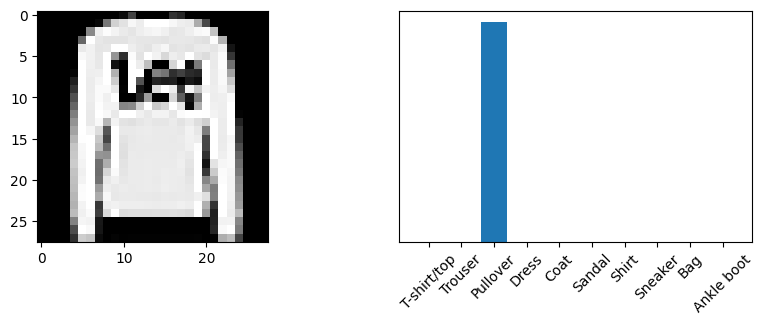

1/1 [==============================] - 0s 20ms/step


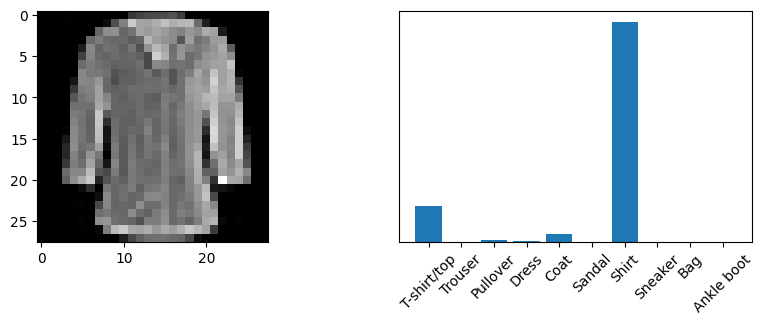

1/1 [==============================] - 0s 27ms/step


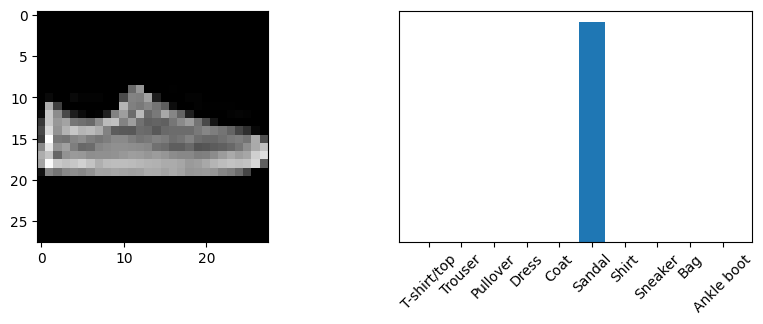

In [10]:
# List of images that we want to check
image_list = [1,4,12]
# for each image in list
for i in image_list:

    # We get the image from the test set
    img = test_images[i]

    # we define the size of our exit plot
    plt.figure(figsize=(10,3))

    # In the first position, we put the image
    plt.subplot(1,2,1)
    plt.imshow(img, cmap='gray')

    # We transform the image to a tensor for processing tasks
    img = (np.expand_dims(img,0))

    # ask the model to predict the image
    prediction_single = model.predict(img)

    # In the second part of the plot we draw the probabilities per each class
    plt.subplot(1,2,2)
    plt.grid(False)
    plt.xticks(range(10), class_names, rotation=45)
    plt.yticks([])
    plt.bar(range(10), prediction_single[0])
    plt.show()